# Shot Boundary Detection (SBD)

_Authors: Mikołaj Leszczuk, Jakub Nawała_

[http://qoe.agh.edu.pl](http://qoe.agh.edu.pl)

In [1]:
plt.plot(frame_numbers[1:], dads, frame_numbers[1:], dpsnrs)
plt.legend(('AD', 'PSNR [db]'));

NameError: name 'plt' is not defined

In [2]:
import matplotlib.pyplot as plt

## Video Summarization

![](https://upload.wikimedia.org/wikipedia/en/8/85/Terminator2poster.jpg)

* Movie time: **137 minutes (about 2 and a half hours)**
* Trailer time: **2-3 minutes**
* Trailer creation is **laborious**
* Could it be created **automatically**?
* What **quality** would it have?

## [Example Summarization](Terminator/Summarizing_01-TZI-trailer_terminator2_2006_04_05b.mp4)

## From Full Video to Summarization

![](from.svg)

![](structural.png)

## **SB** Types

* Abrupt cut:
![](sb_1_1.png)

* Dissolve:
![](sb_1_2.png)

* Fade out:
![](sb_2_1.png)

* Fade in:
![](sb_2_2.png)

## Distinction from **SB**-Like Events

* Camera movements (including pans):
![](dist_1.png)

* Background movements

* Object movements

* Zoom:
![](dist_2.png)

## Two Kinds of Possible Errors (Wrong Sensitivity)

### Detected non-existing **SB**

![](two_1.png)

### Not detected existing **SB**

![](two_2.png)

## Accuracy Evaluations (Output Parameters)

![](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

* Precision: $P=\frac{t_p}{t_p+f_p}$
* Recall: $R=\frac{t_p}{t_p+f_n}$
* Accuracy: $A=\frac{t_p+t_n}{t_p+t_n+f_p+f_n}$

## Uncompressed Pixel-Based Comparison **SBD** Method

* $AD$ (Average Difference) - simplest, fastest
* $PSNR$ (Peak Signal to Noise Ratio) - most commonly used

* $MAE$ (Mean Absolute Error)
* $MSE$ (Mean Square Error)
* $PSE$ (Peak Square Error)
* $RMSE$ (Root Mean-Square Error)

* Comparison of every relevant pixel
* Assumptions
  * $i$ - frame number
  * $M$ - frame width
  * $N$ - frame height
  * $f_i(m,n), 1\leq{}m\leq{}M, 1\leq{}n\leq{}N$ - luminance function

## **SBD** - $AD$

* Averaged difference of each pixel
* $AD=\frac{1}{MN}\sum^{M-1}_{i=0}\sum^{N-1}_{i=0}|I(i,j)-K(i,j)|$
* $AD=0$ for no differences (two identical frames)

## **SBD** - $PSNR$

* $MSE=\frac{1}{MN}\sum^{M-1}_{i=0}\sum^{N-1}_{i=0}[I(i,j)-K(i,j)]^2$
* $PSNR=10\cdot{}log_{10}(\frac{MAX^2_I}{MSE})=20\cdot{}log_{10}(\frac{MAX_I}{\sqrt{MSE}})=\\=20\cdot{}log_{10}(MAX_I)-10\cdot{}log_{10}(MSE)$
* True for 8-bit data (max luminance, $MAX_I$, 255)
* $PSNR=\infty$ for no differences (two identical frames)

## $AD$ and $PSNR$ on Visible $SB$

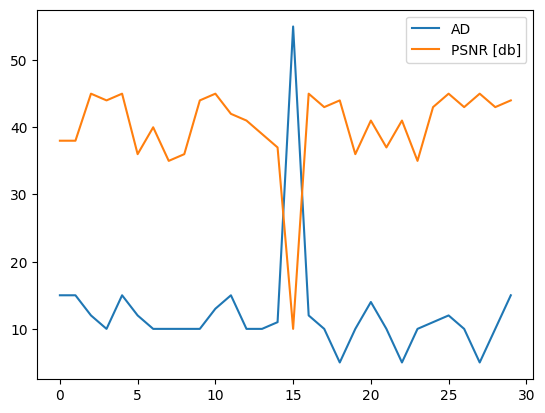

In [3]:
frame_numbers = range(30)
ads = [15, 15, 12, 10, 15, 12, 10, 10, 10, 10, 13, 15, 10, 10, 11,
       55, 12, 10,  5, 10, 14, 10,  5, 10, 11, 12, 10,  5, 10, 15]
psnrs = [38, 38, 45, 44, 45, 36, 40, 35, 36, 44, 45, 42, 41, 39, 37,
         10, 45, 43, 44, 36, 41, 37, 41, 35, 43, 45, 43, 45, 43, 44,]
plt.plot(frame_numbers, ads, frame_numbers, psnrs)
plt.legend(('AD', 'PSNR [db]'));

* Consecutive frames within shot:
  * $AD$ ↓
  * $PSNR$ ↑
* Abrupt **SB**:
  * $AD$ ↑
  * $PSNR$ ↓
* **Basic criterion for detecting SB**

## $AD$ and $PSNR$ on Ambiguous $SB$

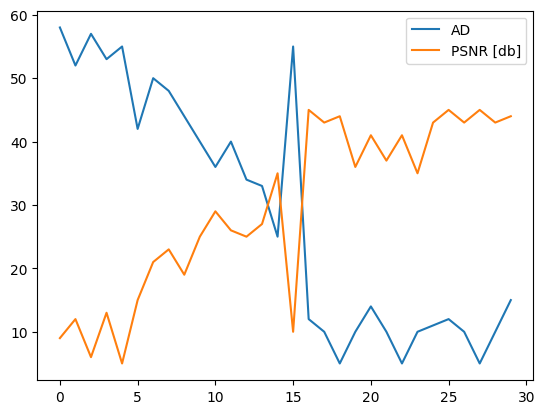

In [4]:
frame_numbers = range(30)
ads = [58, 52, 57, 53, 55, 42, 50, 48, 44, 40, 36, 40, 34, 33, 25,
       55, 12, 10,  5, 10, 14, 10,  5, 10, 11, 12, 10,  5, 10, 15]
psnrs = [ 9, 12,  6, 13,  5, 15, 21, 23, 19, 25, 29, 26, 25, 27, 35,
         10, 45, 43, 44, 36, 41, 37, 41, 35, 43, 45, 43, 45, 43, 44,]
plt.plot(frame_numbers, ads, frame_numbers, psnrs)
plt.legend(('AD', 'PSNR [db]'));

* Consecutive frames within shot but moving camera/background:
  * $AD$ ↑
  * $PSNR$ ↓
* Transitional **SB**:
  * $AD$ ↓
  * $PSNR$ ↑
* **Thresholds cannot be set**

## Over-Sensitivity of Pixel Methods

* Affecting effects:
  * Camera motions
  * Object motions
  * Rotations
  * Zooms
  * Fades

* Example:
![](over.png)

* Other methods required

## $dAD$ and $dPSNR$ Approach

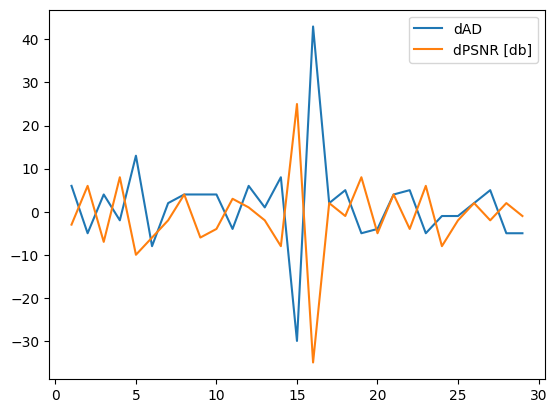

In [6]:
dads = []
dpsnrs = []
for i in frame_numbers[1:]:
    dads.append(ads[i - 1] - ads[i])
    dpsnrs.append(psnrs[i - 1] - psnrs[i])
plt.plot(frame_numbers[1:], dads, frame_numbers[1:], dpsnrs)
plt.legend(('dAD', 'dPSNR [db]'));

* Dynamics of $AD$/$PSNR$ changes ($dAD$/$dPSNR$) considered as well
* **SB** ↔ two peaks:
  * First in direction of $AD$/$PSNR$ change
  * Then in opposite direction
* **Most visible SB detected** (except very slow transitions)
* Example $AD$ and $dAD$ thresholds for 8-bit data (max luminance of 255):
  * $AD\geq+34$
  * $dAD\geq\pm14$